In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset=pd.read_csv("http://bit.ly/w-data")

In [3]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [6]:
X=dataset['Hours']

In [7]:
y=dataset['Scores']

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'Hours vs Score')

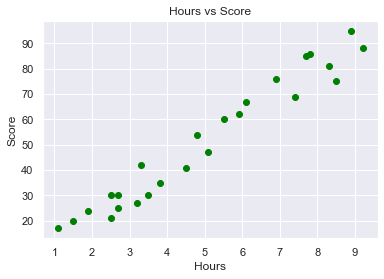

In [9]:
plt.scatter(X,y,marker='o',c="green")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.title("Hours vs Score")

In [10]:
# We can conclude from the above graph that as the number of hours increases, the score also increases

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

## Here I have implemented Simple Linear Regression From Scratch
#### I have used the formula-
#### y=m*x+c, where
#### y= value of dependent variable that we have to calculate
#### x= value of independent variable
#### m = coefficient. It can be calculated using formula- ((x[i]-x_mean)*(y[i]-y_mean))/(x[i]-x_mean)**2), 
#####  where x[i]= current element in X, x_mean= mean of X, y_mean= mean of y
#### c= bias or intercept. Calculated by the formula-
##### c= y_means - m*x_mean

In [13]:
class Linear_Regression:
    
    def fit(self,X,y):
        x_mean=np.mean(X)
        y_mean=np.mean(y)
        covariance=0
        variance_x=0
        self.m=0
        self.c=0
        for i in range(len(X)):
            covariance+=(X[i]-x_mean)*(y[i]-y_mean)
            variance_x+=(X[i]-x_mean)**2
        self.m=covariance/variance_x
        self.c=y_mean-(self.m*x_mean)

    def predict(self,x_test):
        answers=[]
        for i in x_test:
            answers.append(self.m*i+self.c)
        return (answers)
    def coeff(self):
        return self.m
    def bias(self):
        return self.c

In [14]:
model=Linear_Regression()

In [15]:
model.fit(X_test.values,y_test.values)

In [16]:
y_pred=model.predict(X_test.values)

In [17]:
import math
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', 
      math.sqrt(metrics.mean_squared_error(y_test, y_pred)) )

Mean Absolute Error: 3.865699361578642
Mean Squared Error: 17.184387695879277
Root Mean Squared Error: 4.14540561295023


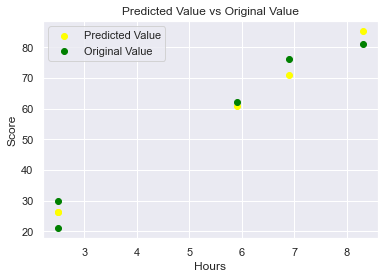

In [18]:
plt.scatter(X_test,y_pred,marker='o',c="yellow",label="Predicted Value")
plt.scatter(X_test,y_test,c="green",label="Original Value")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.title("Predicted Value vs Original Value")
plt.legend()

In [19]:
model1=Linear_Regression()

In [20]:
model1.fit(X.values.reshape(-1,1),y.values.reshape(-1,1))

Text(0.5, 1.0, 'Regression Line')

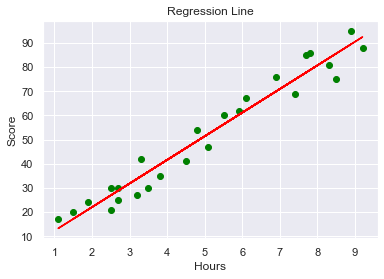

In [21]:
# Plotting the regression line
line = model1.coeff()*X.values+model1.bias()

# Plotting for the test data
plt.scatter(X.values.reshape(-1,1), y.values.reshape(-1,1),c="green")
plt.plot(X.values.reshape(-1,1), line.reshape(-1,1),c="red");
plt.xlabel("Hours")
plt.ylabel("Score")
plt.title("Regression Line")

In [22]:
model1.predict([[9.25]])

[array([92.90985477])]